In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, pi, sqrt, exp
plt.style.use(['science', 'notebook', 'grid'])

## 1. **Matrix Multiplication**

If $A_{m \times n}$ and $B_{n \times p}$ then the product of $A$ and $B$ will be $C_{m \times p}$. Where $C_{ij}= \sum_{k =1}^{n}A_{ik}B_{kj}$

In [2]:
A = [[1, 3, 7], [2, 4, 9]]                       #2×3 matrix
B = [[1, 2, 6, 8], [3, 4, 2, 5], [6, 7, 3, 8]]   #3×4 matrix

C = [[0, 0, 0, 0], [0, 0, 0, 0]]                 #The pdt matrix will be 2×4 

for i in range(len(A)):
    for j in range(len(B[0])):
        for k in range(len(B)):
            C[i][j] += A[i][k]*B[k][j]
print("C matrix\n")
for row in C:
    print(row)

C matrix

[52, 63, 33, 79]
[68, 83, 47, 108]


## 2. **Trace of a matrix**

Trace of a matrix $A_{m \times m}$ is $\sum_{i = 1}^{m}A_{ii}$.

In [3]:
D =[[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]]
Trace = 0
for i in range(len(D)):
    Trace += D[i][i]
print(Trace)

10


## 3. Bisection Method

**Theorem** :  If a function $f(x)$ is continuos between a and b, and $f(a)$ and $f(b)$ are of opposite signs, then there exists at least one root between a and b.

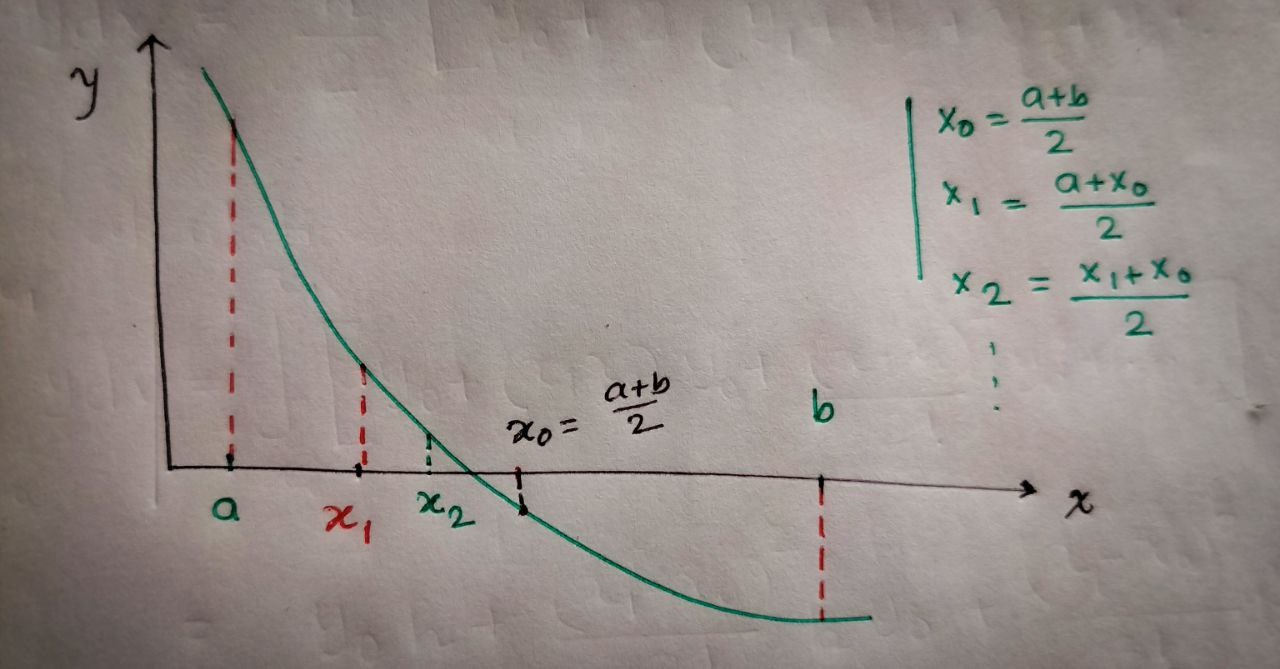

In [4]:
from IPython.display import Image, display
display(Image(filename = '/home/souvik/Downloads/Telegram Desktop/Bisection.jpg',width=500,
    height=1000))

#### Algorithm:

1. Choose two real number $a$ and $b$ *such that $f(a)f(b)<0$*.

2. Set $x_r = \frac {a+b}{2}$

3.   (a) If $f(a)f(x_r) < 0$, the root lies in the interval $(a, x_r)$. Then, set $b = x_r$ and go to step 2 above.

     (b) If $f(a)f(b) > 0$, the root lies in the interval $(a, x_r)$. Then, set $a = x_r$ and go to step 2 above.
     
     (c) If $f(a)f(x_r) = 0$, $x_r$ is the root of the equation, terminate the comptation.

In [5]:
# Bisection method
def bisection(a, b, err, f):
    if f(a) == 0:
        return a
    elif f(b) == 0:
        return b
    elif f(a)*f(b) < 0:
        counter = 0
        while abs(a-b) > err:
            counter += 1
            x = (a+b)/2
            if f(a)*f(x) < 0:
                b = x
            elif f(b)*f(x) < 0:
                a = x
            else:
                return x, counter
        return x, counter
    else:
        return None

## 4. Newton-Raphson

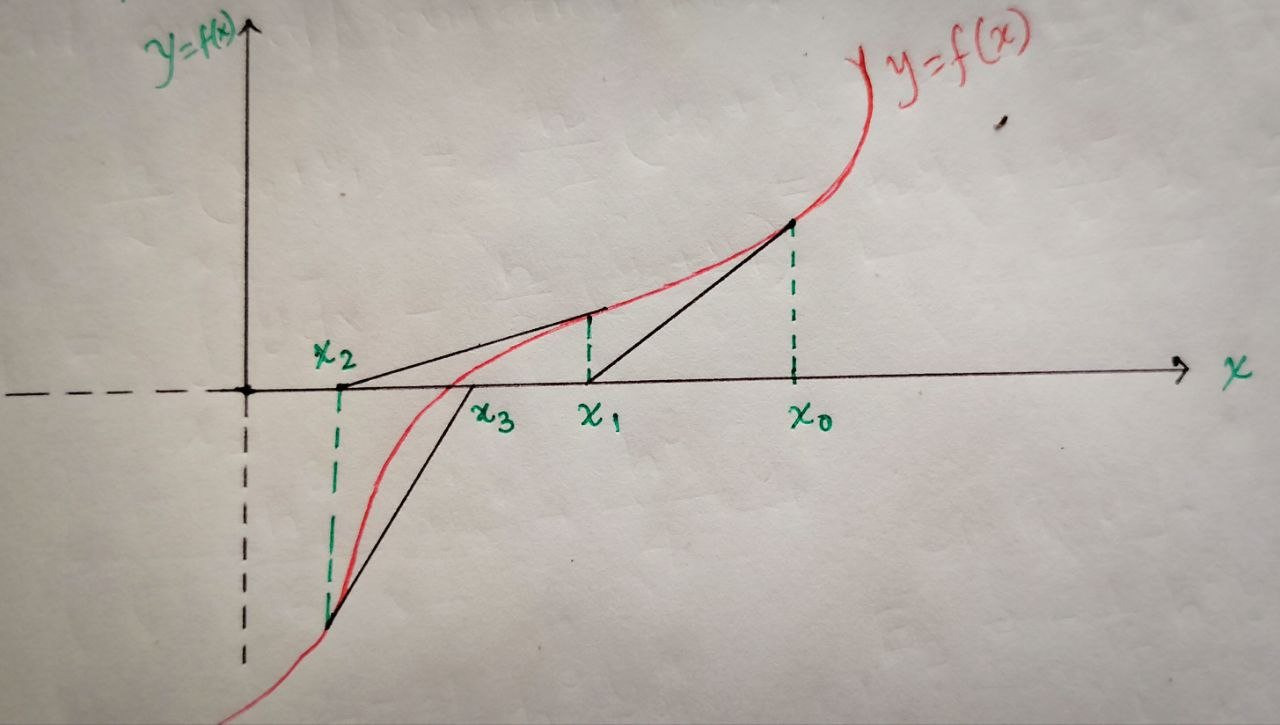

In [6]:
from IPython.display import Image, display
display(Image(filename = '/home/souvik/Downloads/Telegram Desktop/Newton.jpg',width=500,
    height=1000))

Red curve is some arbitrary functional graph of $y = f(x)$. We have to guess a root. Let say $x0$ is our guess. Now how can we go to next root(say $x_1$)? We can use the slope at the point $x_0$.
$$ f'(x_0) = \frac {f(x_0-0}{x_0-x_1}$$
Therefore, $$x_1 = x_0 - \frac {f(x_0)}{f'(x_0)}$$
Yeah, we got $x_1$. Next goal is to find $x_2$. Again we will use slope method.
$$ f'(x_1) = \frac {f(x_1-0}{x_1-x_2}$$
Therefore, $$x_2 = x_1 - \frac {f(x_1)}{f'(x_1)}$$
And the process will go until we get the approximate value we are interested.
Final Formula is iterative method:
$$x_{n+1}=x_n-\frac {f(x_n)}{f'(x_n)}$$

In [7]:
def NR(f, f_pr, x, err):
    counter = 0
    while abs(f(x)) > err:
        counter += 1
        x  -=  f(x)/f_pr(x)
    return x, counter

#### Problem:
We are interested to find the root of the transdental equation:
$$f(x) = \tan(x) -x$$

We going to test this problem both in bisection as well as NR method with tolarence of 0.01 and inspect the number of iteration.
We need the first derivative of $f'(x) = \sec^2(x)$ for NR method.

In [8]:
import numpy as np

def f(x): return np.tan(x) - x
def f_pr(x): return 1/np.cos(x)**2

# Two initial guess for Bisection:
a, b = -1, 0.5
# Guess a root for NR
x0 = 0.5
# Tolarence
err = 0.0001

print("Bisection answer")
print(bisection(a, b, err, f))
print("NR answer")
print(NR(f, f_pr, x0, err))

Bisection answer
(3.0517578125e-05, 14)
NR answer
(0.06688888155014382, 330)


## 5. Trapezoidal Method

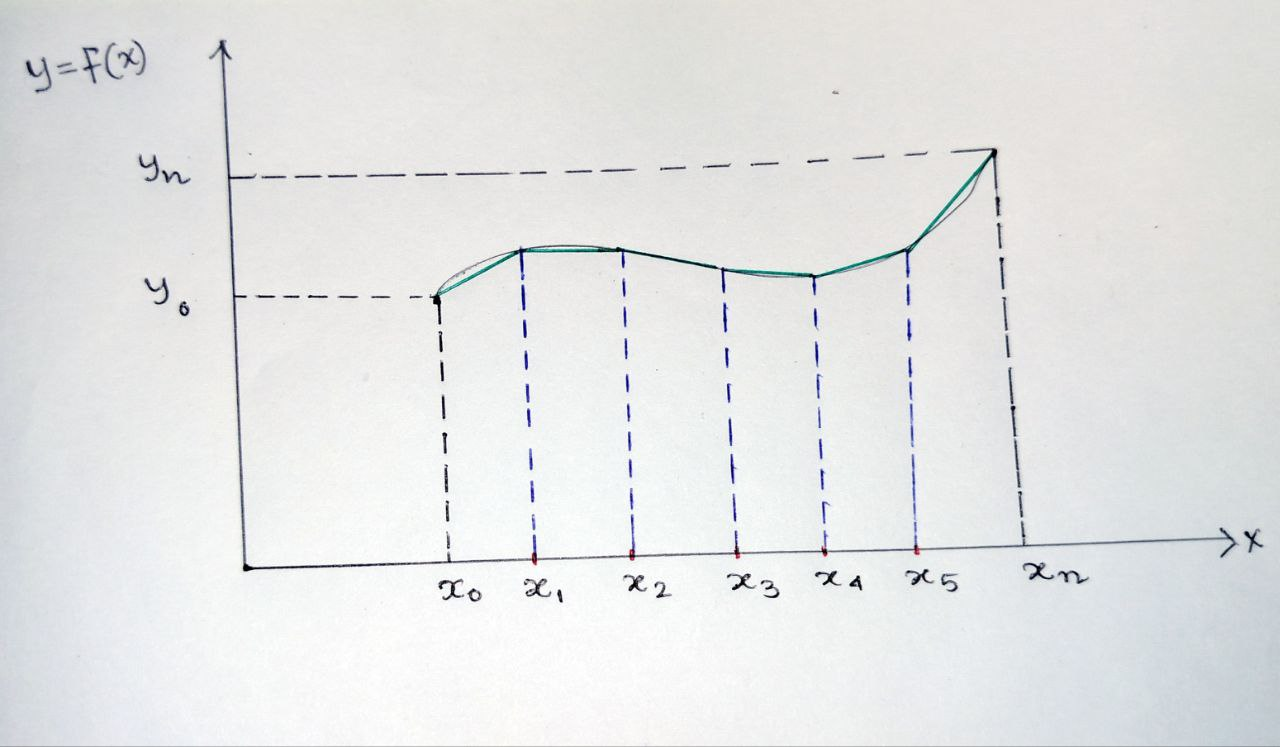

In [9]:
from IPython.display import Image, display
display(Image(filename = '/home/souvik/Downloads/Telegram Desktop/Trapezoidal.png',width=500,
    height=1000))

In case of Trapezoidal method we fit the given curve using **Straight lines**. In the above picture I was able only to show 6 intervals. But it increses as we are going to decrese the size of the interval. 
   Let $h$ be equally spaced interval. So $(x_0-x_1)=(x_1-x_2)=...=(x_{n-1}-x_n)=h$

For a particular trapezoide, we can use the area of a trapezoid

   $$\int_{x_{n-1}}^{x_n} y dx \approx \frac {h}{2} (y_{n-1}+y_n)$$
  Using the above relation we can write:
    $$\int_{x_{0}}^{x_n} y dx \approx \frac {h}{2} [y_0+2(y_1+y_2+...+y_{n-1})+y_n]$$    


In [10]:
def Trapezoidal(xi, xf, n, f):
    x = np.linspace(xi, xf, n)
    h = (xf-xi)/(n-1)
    y = f(x)
    sum = 0
    for i in range(1, len(y)-1):
        sum += y[i]

    # Trapezoidal formula:
    sum = 0.5*h*(y[0]+2*sum+y[len(y)-1])
    return sum

## 6. Simpson's 1/3 rule

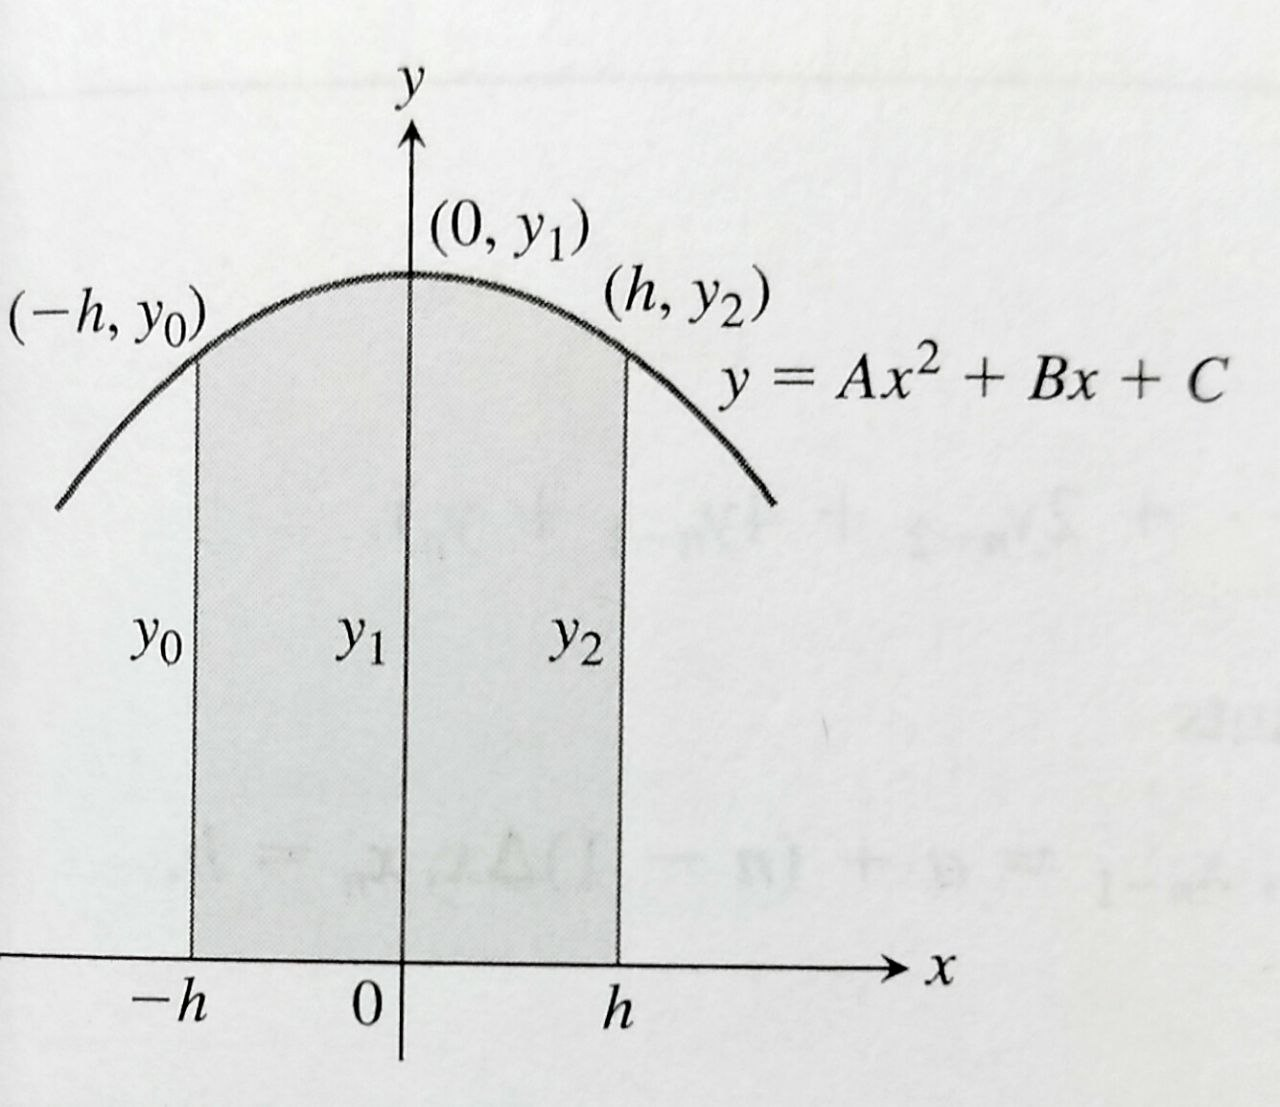

In [11]:
from IPython.display import Image, display
display(Image(filename = '/home/souvik/Downloads/Telegram Desktop/Simpson.jpg',width=500,
    height=500))

We fit the given function with a parabola (eq: $y(x) = Ax^2+Bx+c$). To make the calculation less we take the curve passing through three points $(-h, y_0)$, $(0, y_1)$, $(h, y_2)$. Substituting the given points into the parabola we have:$y_0 = Ah^2-Bh+C$, $y_1 = C$, $y_2 = Ah^2+Bh+C$. So $y_0+y_2-2y_1=2Ah^2$.

Now the area under the given fig is
$$A = \int_{-h}^{h}(Ax^2+Bx+C)dx$$
$$ A = \frac{h}{3}(2Ah^2+6C)$$
$$ A = \frac{h}{3}(y_0+y_2-2y_1+6y_1)$$
$$A = \frac{h}{3}(y_0+4y_1+y_2)$$

Now **shifting the parabola horizontal does not change the area under the curve under it**. Thus the area under the parabola through $(x_0,y_0)$,$(x_1, y_1)$,$(x_2, y_2)$ is still
$$\frac{h}{3}(y_0+4y_1+y_2)$$

Therefore, 
$$\int_{a}^{b}f(x)dx \approx \frac{h}{3}(y_0+4y_1+y_2)+ \frac{h}{3}(y_2+4y_3+y_4)+ \frac{h}{3}(y_4+4y_5+y_6)+...+ \frac{h}{3}(y_{n-2}+4y_{n-1}+y_n) $$

Final expression becomes:
$$\int_{a}^{b}f(x)dx = \frac{h}{3}[y_0+4(y_1+y_3+...+y_{n-1})+2(y_2+y_4+...+y_n)]$$

In [12]:
def Simpson(xi, xf, n, f):
    x = np.linspace(xi, xf, n)
    h = (xf - xi)/(n - 1)
    y = f(x)
 
    sum1 = 0
    for i in range(1, n-1, 2):
        sum1 += y[i]
 
    sum2 = 0
    for i in range(2, n-1, 2):
        sum2 += y[i]
     
    #Simpson 1/3 rule    
    sum = h*(y[0] + 4*sum1 + 2*sum2 + y[n-1])/3
    
    return sum

#### Problem:

$$2\int_{0}^{\infty}e^{-x^2}dx=\sqrt{\pi}=1.77245$$


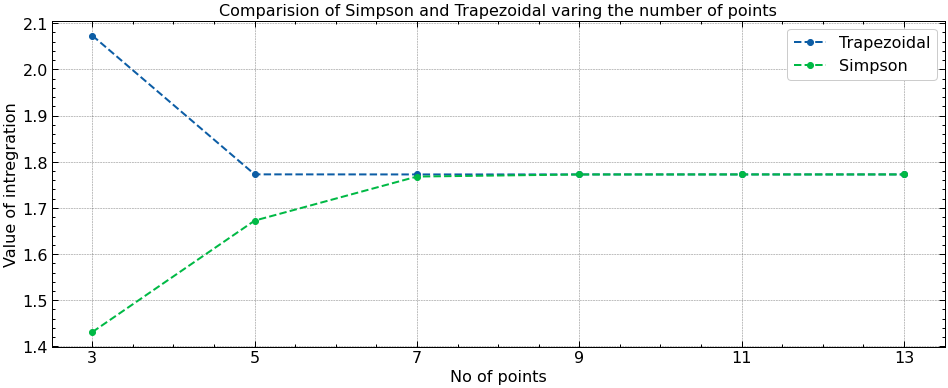

In [13]:
 #Function defination
def f(x):
    return 2*np.exp(-x*x)
 
# Limit of integration
xi = 0
xf = 4       #Taking the upper limit 3 instead of infinity becuase of bell shape
 
# List to plot 
N = []
SS = []
TT = []

for i in range(3, 15, 2):
    S = Simpson(xi, xf, i, f)
    T = Trapezoidal(xi, xf, i, f)
    N.append(i)
    SS.append(S)
    TT.append(T)

#Plot
plt.figure(figsize = (16, 6))
plt.plot(N, TT,"--o", label = "Trapezoidal")
plt.plot(N, SS,"--o", label = "Simpson")
plt.legend(loc = 'best')
plt.title("Comparision of Simpson and Trapezoidal varing the number of points")
plt.ylabel("Value of intregration")
plt.xlabel('No of points')
plt.xticks(np.arange(3, 15, step=2))
plt.show()

## 6. Fourier series

> **Problem**: Find the Fourier Series for the period of $2\pi$.

$$ f(x)=  \left\{
\begin{array}{ll}
      -1 & [-\pi, 0] \\
      0 & [0,\pi] \\
\end{array} 
\right. 
$$


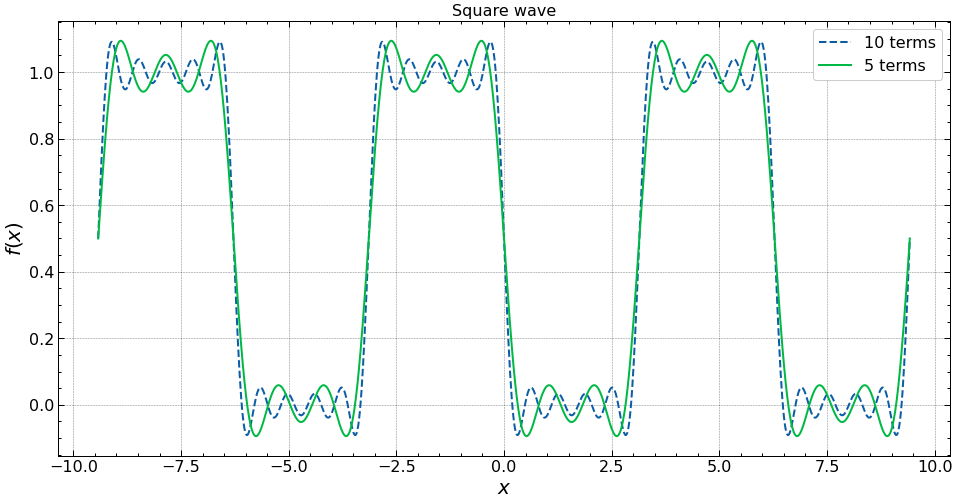

In [14]:
def a(n):
    if n == 0:
        return Simpson(-pi, 0, 1001, f = lambda x: x**0)/pi ##Note x^0 = 1
    else:
        return Simpson(-pi, 0, 1001, f = lambda x: cos(n*x))/pi
    
def b(n):
    return Simpson(-pi, 0, 1001, f = lambda x: sin(n*x))/pi
# Fourier series
def fourier(x, n):
    Fourier = a(0)/2
    for i in range(1,n+1):
        Fourier += a(i)*np.cos(i*x) + b(i)*np.sin(i*x)
    return Fourier

x = np.linspace(-3*pi, 3*pi, 1000)
y1 = fourier(x, 10)
y2 = fourier(x, 5)

#Plotting
plt.figure(figsize=(16, 8))
plt.plot(x,y1,"--", label = "10 terms")
plt.plot(x,y2, label = "5 terms")
plt.legend(loc = 'best')
plt.xlabel(r"$x$", size = 20)
plt.ylabel(r"$f(x)$", size = 20)
plt.title("Square wave")
plt.show()

> **Half-wave rectifier**:
$$ f(x)=  \left\{
\begin{array}{ll}
      sin(x) & [0, \pi] \\
      0 & [\pi, 2\pi] \\
\end{array} 
\right. 
$$

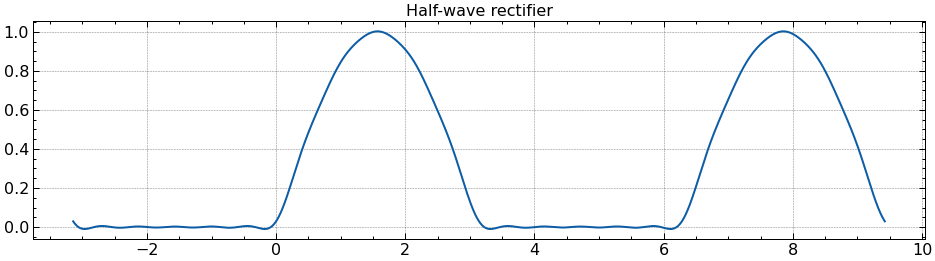

In [15]:
def a(n):
    if n == 0:
        return Simpson(0, pi, 31, f = lambda x: sin(x))/pi
    else:
        return Simpson(0, pi, 31, f = lambda x: sin(x)*cos(n*x))/pi
    
def b(n):
    return Simpson(0, pi, 31, f = lambda x: sin(x)*sin(n*x))/pi
# Fourier series
def fourier(x, n):
    Fourier = a(0)/2
    for i in range(1,n+1):
        Fourier += a(i)*np.cos(i*x) + b(i)*np.sin(i*x)
    return Fourier

x = np.linspace(-pi, 3*pi, 1000)
y = fourier(x, 10)

#Plotting
plt.figure(figsize=(16, 4))
plt.title("Half-wave rectifier")
plt.plot(x,y)
plt.show()

## 7. Euler method

The Taylor series about $x = 0$ is given by
$$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2!}f''(x)+\frac{h^3}{3!}f'''(x)+..$$

As we are going to evalute the solution in modern computer so we can make the $h$ very small. So we are gonna to take only two terms of the series.

$$f(x+h) = f(x) + hf'(x)$$

The recurssion relationship can be written as, THE EULER METHOD

$$f(x_n) = f(x_{n-1})+hf'(x_{n-1})$$

The 1st order diffarential equation can be in the form of 

$$\frac{dy}{dx}=f(x,y)$$

##  Second order Ordinary Diffarential Equation using Euler method

In this case you will solve two 1st order DE simulataneously using Euler Method.
Say the DE is given by

$$y''(x)+p(x) y'(x)+q(x)y(x)=g(x,y)$$

Substituting $z = y'$, so the above equation becomes $z'=\frac{g(x,y)-q(x)y(x)}{p(x)z}$

So we have two ODE:

1. $z(y) = y'$
2. $z'(x,y,z)=\frac{g(x,y)-q(x)y(x)}{p(x)z}$

We have to simultaneously solve these equations.


####  Equation of motion of a simple pendulum:
$$\frac{d^2\theta}{dt^2}= - \sin(\theta)$$

In [16]:
def simplePendulum(ti, theta_i, wi, tf, h):
        #Diffantial equation
    def f(theta, w, t):
        return -sin(theta)
    
    #Empty lists
    tt, theA = [], []
    
    while (tf - ti) >= h:
        tt.append(ti)
        theA.append(theta_i)
        theta_i += h*wi
        wi += h*f(theta_i, wi, ti)
        ti += h
        
    return tt, theA

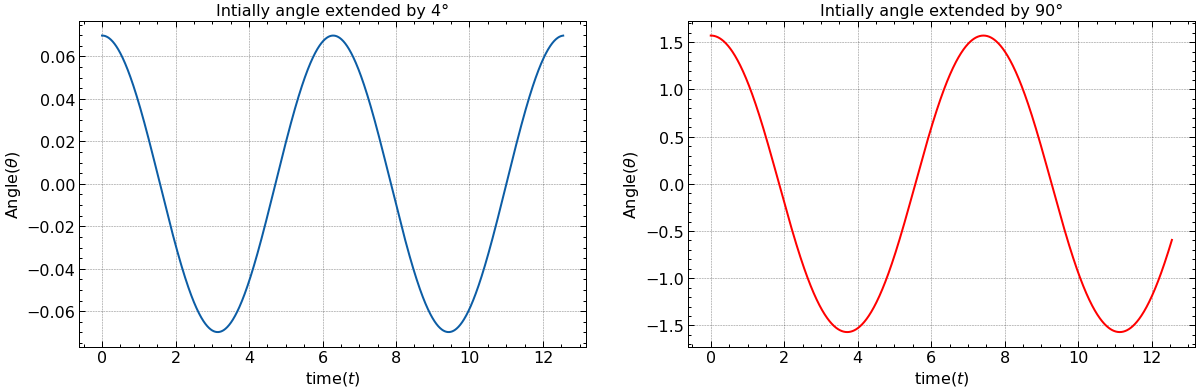

In [17]:
## Degree to radian
def degRad(x):
    return np.pi*x/180

## Initial angle 90 degree
ti = 0; theta_i = degRad(90); wi = 0; tf = 4*np.pi; h = 0.01
tt1, theA1 = simplePendulum(ti, theta_i, wi, tf, h)

## Initial angle 4 degree
ti = 0; theta_i = degRad(4); wi = 0; tf = 4*np.pi; h = 0.01
tt2, theA2 = simplePendulum(ti, theta_i, wi, tf, h)

#Plotting 
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.title("Intially angle extended by 4°")
plt.plot(tt2, theA2)
plt.xlabel(r"time($t$)")
plt.ylabel(r"Angle($\theta$)")

plt.subplot(1, 2,  2)
plt.title("Intially angle extended by 90°")
plt.plot(tt1, theA1, "r")
plt.xlabel(r"time($t$)")
plt.ylabel(r"Angle($\theta$)")
plt.show()

In [18]:
## To find the time period
def TimePeriod(x, t):
    i = 1
    while (x[i] > x[i+1]):
        i += 1

    return 2*(t[i] - t[0])

print("The time period for angle 4°", TimePeriod(theA2, tt2))
print("The time period for angle 90°", TimePeriod(theA1, tt1))

The time period for angle 4° 6.299999999999954
The time period for angle 90° 7.41999999999993


## Equation of Forced oscillator
$$\ddot x+2 b \dot x + \omega ^2 x = f_d \cos(\omega_d t)$$

Transient Sol: $$x = \frac{f_d}{\sqrt{(\omega_d ^2 - \omega ^2)^2+4b^2 \omega_d^2}}\cos(\omega_d t - \phi)$$

The amplitude of the steady-state oscillation is given by
$$\mathcal{A} = \frac{f_d}{\sqrt{(\omega_d ^2 - \omega ^2)^2+4b^2 \omega_d^2}}$$

**Resonance frequency is given by**: $\omega_R = \sqrt{\omega^2 - b^2}$

In [19]:
def Forced_Oscillator(t, x, v, tf,h ,b , w, f_d, w_d):
    #Diffantial equation
    def f(x, v, t):
        return -2*b*v - w**2*x + f_d*np.cos(w_d*t)
    #Empty lists
    tt, xx = [], []
    while (t - tf <= h):
        tt.append(t)
        xx.append(x)
        x += h*v
        v += h*f(x, v, t)
        t += h
    return tt, xx

> I intentionally take $\omega = \sqrt{24}$ and $b = 2$ such that the resonance frequency becomes $\omega_R = 4$

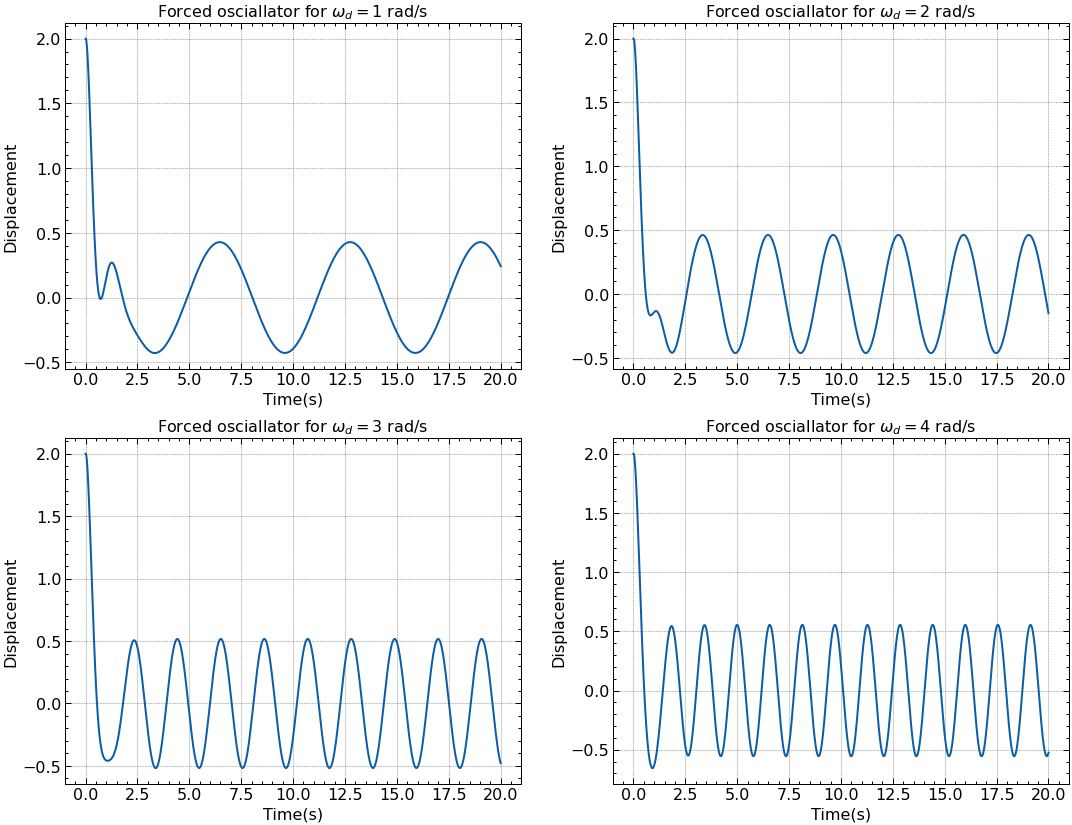

In [20]:
#Parameters
t = 0; x = 2; v = 0; tf = 20; h = 0.01; b = 2; w = np.sqrt(24); f_d = 10;

#To plot some oscillations
plt.figure(figsize=(18, 14))
for w_d in range(1, 5):
    plt.subplot(2, 2, w_d)
    tim, dis = Forced_Oscillator(t, x, v, tf,h ,b , w, f_d, w_d)
    plt.plot(tim, dis)
    plt.title(r"Forced osciallator for $\omega_d = $"+ str(w_d)+" rad/s")
    plt.xlabel("Time(s)")
    plt.ylabel("Displacement")
plt.show()

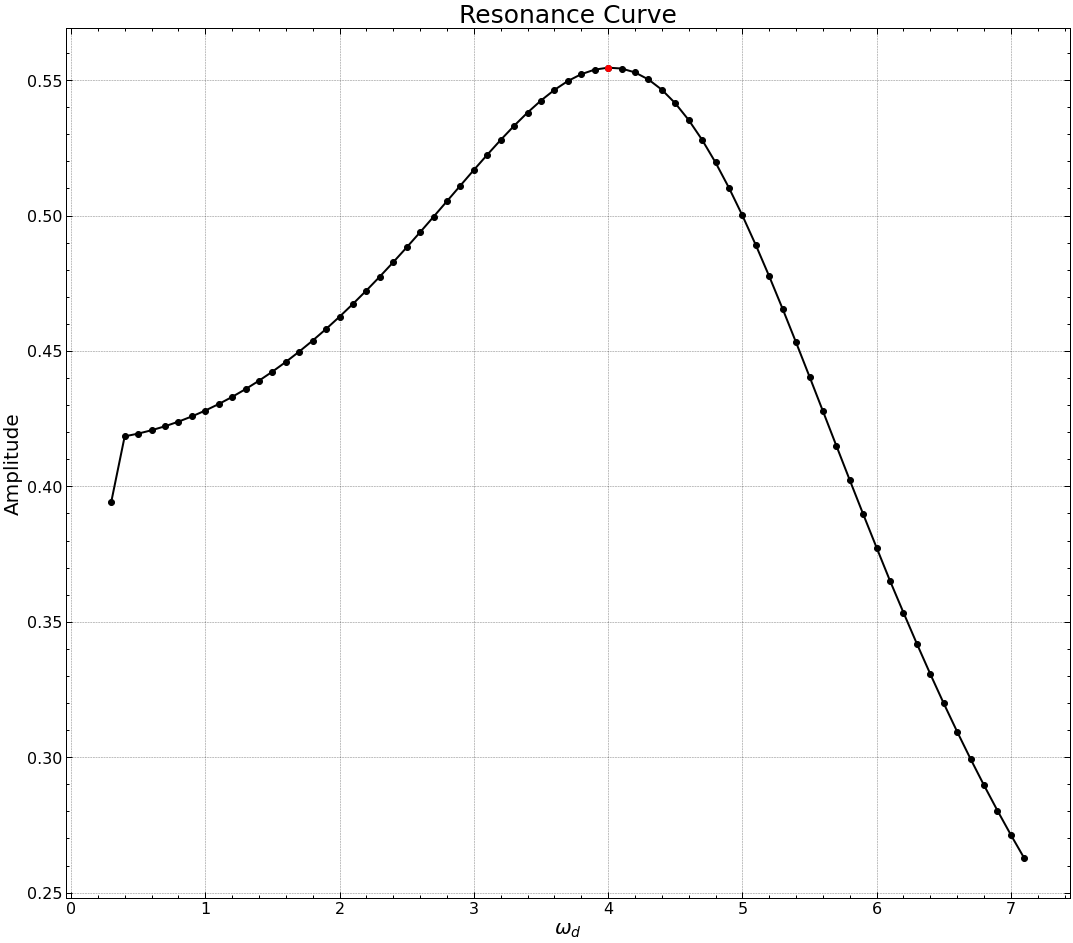

Resonance frequency is 4.000000000000002


In [21]:
n = 1 + (tf - t)/h

w_d = 0.2

WD = []
Res = []

while (w_d <= 7):
    w_d += 0.1
    WD.append(w_d)
    tim, dis = Forced_Oscillator(t, x, v, tf,h ,b , w, f_d, w_d)
    Res.append(max(dis[-int(n/2):]))

#Index of max of Res
MI = Res.index(max(Res))
    
plt.figure(figsize=(18, 16))
plt.title("Resonance Curve", size = 25)
plt.plot(WD, Res, "-ko")
plt.xlabel(r"$\omega_d$", size = 20)
plt.ylabel(r"Amplitude", size = 20)
plt.plot(WD[MI], max(Res),"ro")
plt.show()
print("Resonance frequency is",WD[MI])

## 8. Fourier Transform of Continuous Function

For a continuos range of frequencies the Fourier tansforms are
$$\mathcal{G(\alpha)} = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty}\mathcal{F(x)}e^{-i\alpha x}dx$$
$$\mathcal{F(x)} = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty}g(\alpha)e^{i\alpha x}d\alpha$$

We can decompose the Euler in real and imaginary functions and after using the poperty of odd and even functions we can get the expressions following.

>### In case of  even function :
$$\mathcal{G(\alpha)} = \sqrt{\frac{2}{\pi}} \int_{0}^{\infty}\mathcal{F(x)}\cos(\alpha x)dx$$
$$\mathcal{F(x)} = \sqrt{\frac{2}{\pi}} \int_{0}^{\infty}g(\alpha)\cos(\alpha x)d\alpha$$

>### In case of odd function :
$$\mathcal{G(\alpha)} = \sqrt{\frac{2}{\pi}} \int_{0}^{\infty}\mathcal{F(x)}\sin(\alpha x)dx$$
$$\mathcal{F(x)} = \sqrt{\frac{2}{\pi}} \int_{0}^{\infty}\mathcal{G(\alpha)}\sin(\alpha x)d\alpha$$

> ### Fourier transform of: 
$$ \mathcal{F(x)}=  \left\{
\begin{array}{ll}
      1 & [-0.4, 0.4] \\
      0 & [else] \\
\end{array} 
\right. 
$$

In [22]:
def Trap(xi, xf, h, f):
    xx, yy = [], []
    while (abs(xi - xf) >= h):
        xx.append(xi)
        y = f(xi)
        yy.append(y)
        xi += h
        
    sum1 = sum(yy[i] for i in range(1, len(yy)-2))
    
    return 0.5*h*(yy[0]+ 2*sum1 +yy[len(yy)-1])

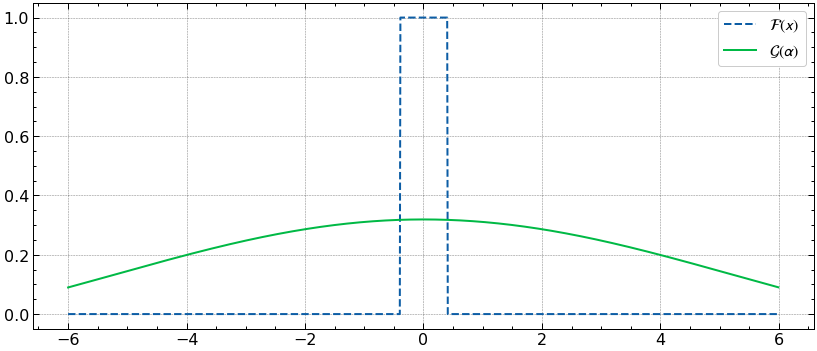

In [23]:
ai = -6
af = 6
da = 0.01

# Empty lists:
aa = []; gg = []; ff = []

#F(x)
def f(x):
    if abs(x)<0.4: return 1
    else: return 0
    
#Fourier Transform    
def g(a): return Trap(-3, 3, da, lambda x: f(x)*cos(a*x))/sqrt(2*pi)  #As it is a even function

while abs(ai - af) >= da:
    ff.append(f(ai))
    gg.append(g(ai))
    aa.append(ai)
    ai += da
plt.figure(figsize=(14, 6))
plt.plot(aa, ff, "--", label = r"$\mathcal{F(x)}$")
plt.plot(aa, gg, label = r"$\mathcal{G(\alpha)}$")
plt.legend(loc = 'best')
plt.show()

> ### Fourier transform of: 
$$\mathcal{F(x)} = e^{-x^2}$$

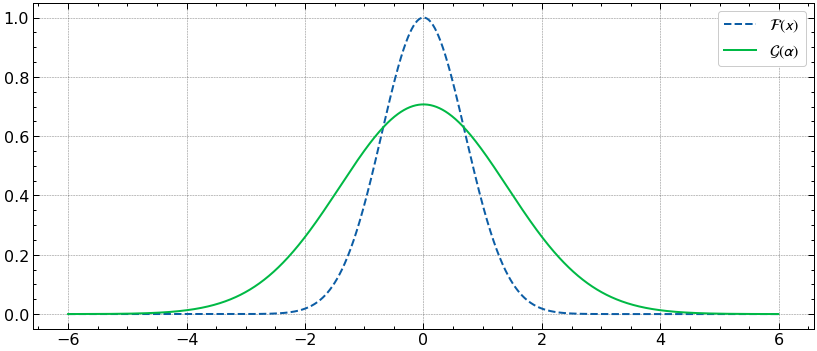

In [24]:
ai = -6
af = 6
da = 0.01

# Empty lists:
aa = []; gg = []; ff = []

#F(x)
def f(x):
    return np.exp(-x**2)
    
#Fourier Transform    
def g(a): return Trap(-5, 5, da, lambda x: f(x)*cos(a*x))/sqrt(2*pi)  #As it is a even function

while abs(ai - af) >= da:
    ff.append(f(ai))
    gg.append(g(ai))
    aa.append(ai)
    ai += da
plt.figure(figsize=(14, 6))
plt.plot(aa, ff, "--", label = r"$\mathcal{F(x)}$")
plt.plot(aa, gg, label = r"$\mathcal{G(\alpha)}$")
plt.legend(loc = 'best')
plt.show()